## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

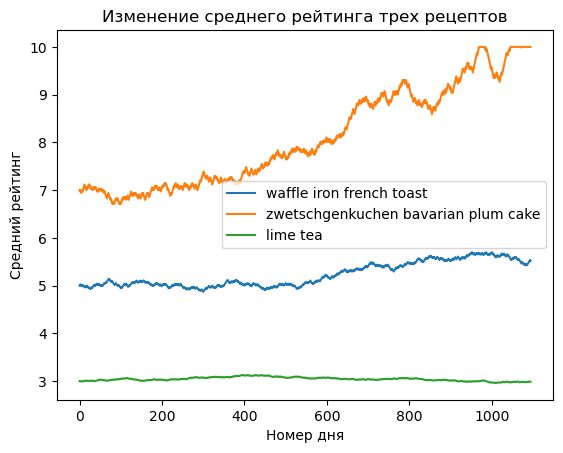

In [8]:
data = np.load('average_ratings.npy')

recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'] # Названия рецептов

# Создание временных рядов
for i in range(3):
    plt.plot(data[i], label=recipes[i])

# Добавление подписей осей и рисунка
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


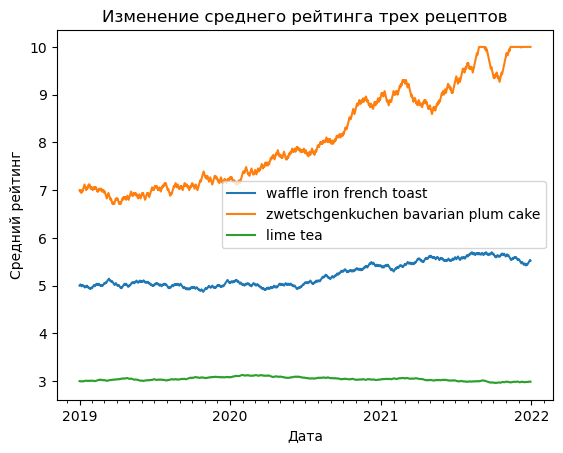

In [9]:
import matplotlib.dates as mdates
import datetime
    
dates = np.array([datetime.date(2019, 1, 1) + datetime.timedelta(days=i) for i in range(len(data[0]))])

# Создание рисунка
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(dates, data[i], label=recipes[i])

# Настройка оси x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Добавление подписей осей и рисунка
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

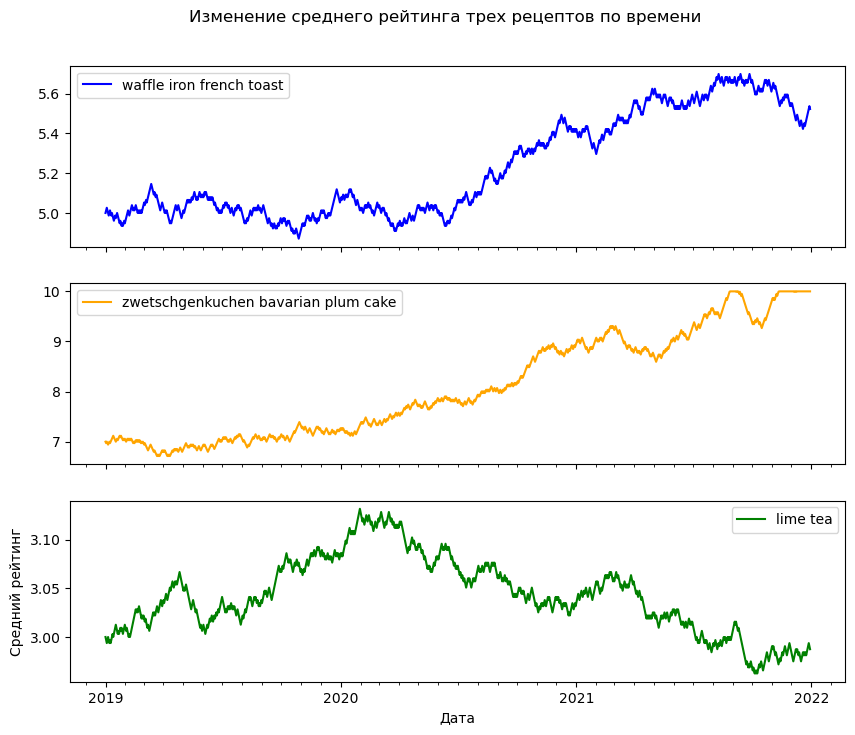

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)  # Создание трех подграфиков с общей горизонтальной осью

colors = ['blue', 'orange', 'green']  # Цвета для линий графиков
for i, ax in enumerate(axs):
    ax.plot(dates, data[i], label=recipes[i], color=colors[i])  # Построение графиков на каждом подграфике
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Установка основных делений для горизонтальной оси x на год
    ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Установка вспомогательных делений для горизонтальной оси x на месяц
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Форматирование основных делений оси x в формат года

plt.xlabel('Дата')  # Добавление подписи для горизонтальной оси x
plt.ylabel('Средний рейтинг')  # Добавление подписи для вертикальной оси y
plt.suptitle('Изменение среднего рейтинга трех рецептов по времени', y=0.95)  # Добавление общего заголовка к графикам

plt.show()  # Отображение графиков

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


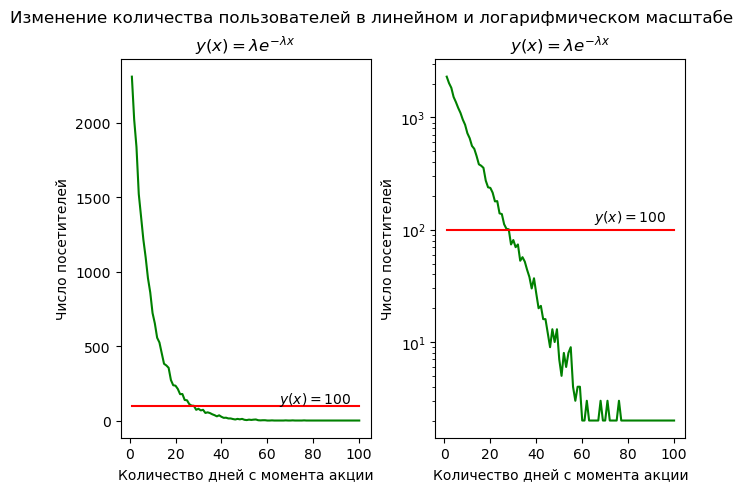

In [11]:
visitors = np.load('visitors.npy')
days = [day for day in range(1, 101, 1)]
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, layout = 'constrained')
hun = [100] * 100

ax1.plot(days, visitors, 'g')
ax1.plot(days, hun, 'r')
ax2.plot(days, visitors, 'g')
ax2.plot(days, hun, 'r')
ax2.set_yscale('log')

ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')
ax1.text(65, 120, '$y(x) = 100$')
ax2.text(65, 120, '$y(x) = 100$')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе');

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [12]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,30000.000000,30000.000000,3.000000e+04,18810.000000,21120.000000
mean,221879.294000,123.358133,5.635901e+06,9.805582,9.008286
std,140974.425354,1660.876602,1.007373e+08,5.944155,3.715213
min,48.000000,0.000000,1.530000e+03,1.000000,1.000000
25%,99713.500000,20.000000,5.596450e+04,6.000000,6.000000
50%,207773.500000,40.000000,1.699690e+05,9.000000,9.000000
75%,333696.750000,65.000000,3.960780e+05,12.000000,11.000000
max,536747.000000,129615.000000,2.002248e+09,88.000000,34.000000


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [32]:
def time(row):
    if row['minutes'] < 5:
      return 'короткий рецепт'
    elif 5 <= row['minutes'] < 50:
      return 'средний рецепт'
    else:
      return 'длинный рецепт'

recipes['time'] = recipes.apply(lambda row : duration(row), axis=1) 

recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration,time
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный рецепт,длинный рецепт
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний рецепт,средний рецепт
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний рецепт,средний рецепт
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний рецепт,средний рецепт
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний рецепт,средний рецепт


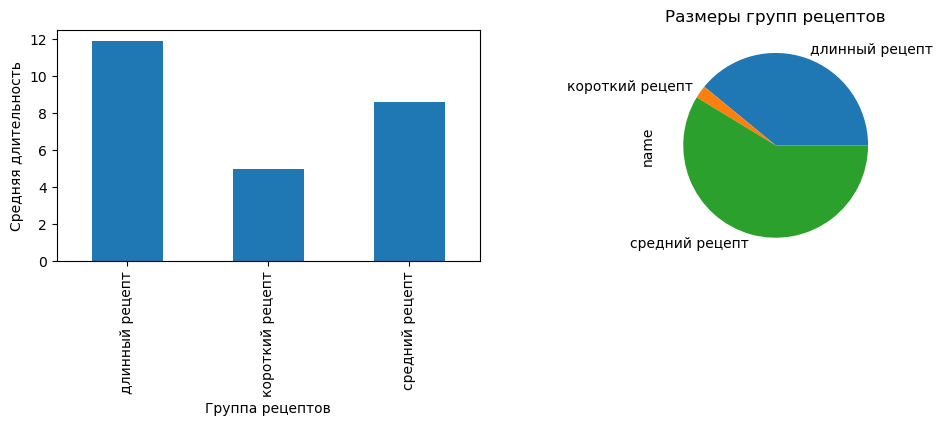

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

recipes.groupby('time')['n_steps'].mean().plot(kind='bar', ax = ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

recipes.groupby('time').count().name.plot(kind='pie', ax = ax2)
ax2.set_title('Размеры групп рецептов');

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

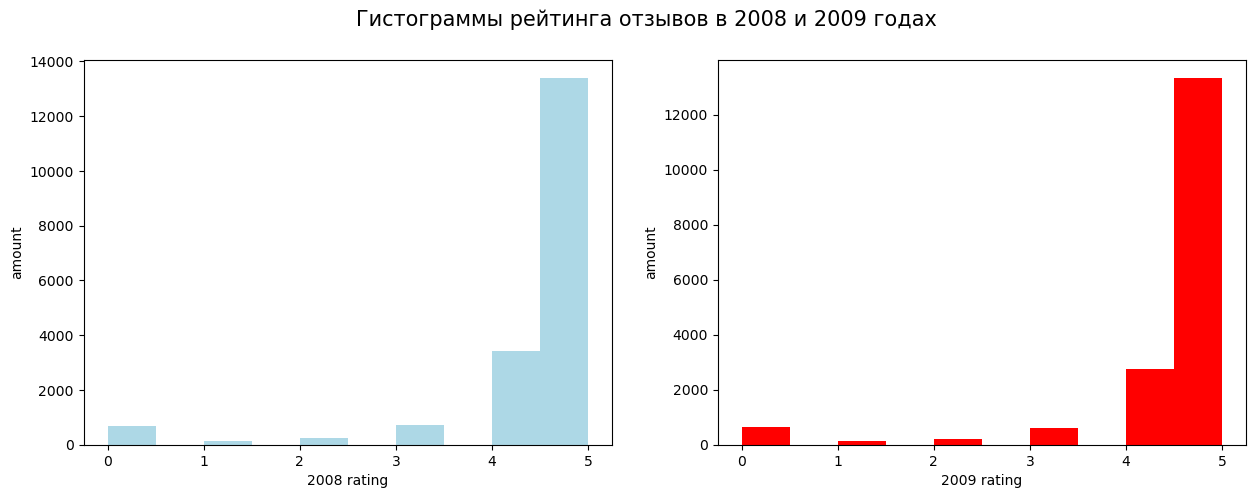

In [34]:
reviews['year'] = reviews['date'].astype(str).apply(lambda s: s.split('-')[0])

reviews_2008 = reviews.loc[(reviews['year'] == '2008')]
reviews_2009 = reviews.loc[(reviews['year'] == '2009')]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

reviews_2008['rating'].plot.hist(ax=ax1, color='lightblue')
ax1.set_ylabel('amount')
ax1.set_xlabel('2008 rating')

reviews_2009['rating'].plot.hist(ax=ax2, color='red')
ax2.set_ylabel('amount')
ax2.set_xlabel('2009 rating')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize = 15);

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

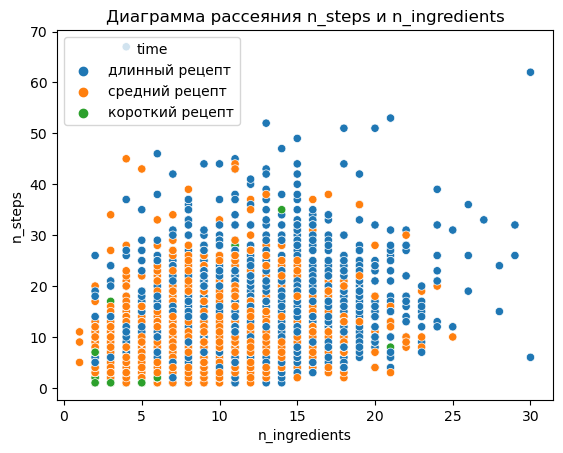

In [35]:
fig = sns.scatterplot(data = recipes, x = 'n_ingredients', y = 'n_steps', hue='time')
fig.set_title('Диаграмма рассеяния n_steps и n_ingredients');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

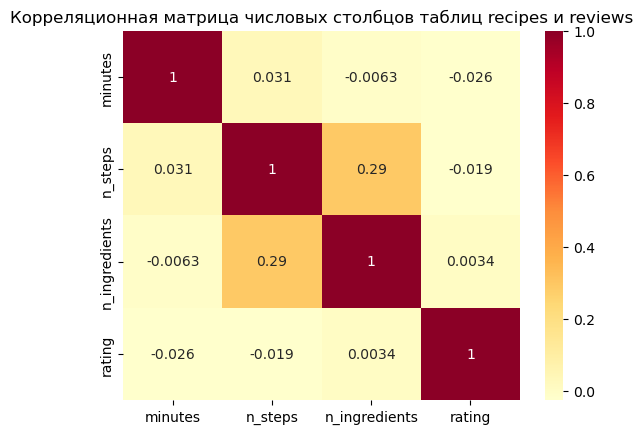

In [44]:
table = recipes.merge(reviews, left_on = 'id', right_on = 'recipe_id', how = 'inner')[['minutes', 'n_steps', 'n_ingredients', 'rating']] 
#inner: use intersection of keys from both frames

fig = sns.heatmap(table.corr(), cmap = 'YlOrRd', center=0.5, annot = True)
fig.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');

In [45]:
table

,minutes,n_steps,n_ingredients,rating
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5
126694,60,NaN,NaN,5
